In [331]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### data prep

In [332]:
from sklearn.datasets import make_blobs

In [333]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=1.0, random_state=3)

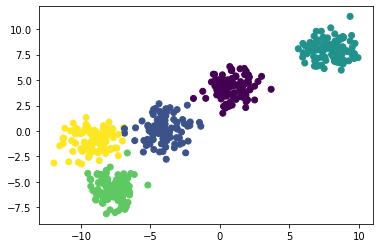

In [334]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [335]:
make_blobs?

In [336]:
color = ['red', 'green', 'blue', 'orange', '']

def distance(p2, p1):
    return np.sum((p2 - p1)**2)**0.5

def initialization(X, K):
    clusturs = {}
    for k in range(K):
        points = []
        center = 20*(np.random.random((2, )) - 0.5)
        cluster = {
            'points':points,
            'center':center,
        }
        clusturs[k] = cluster
    
    return clusturs


def update(clusters, K):
    # update the center of each cluster with zero new points 
    for k in range(K):
        pts = np.array(clusters[k]['points'])
        if pts.shape[0] > 0: # if cluster has some points
            new_center = np.mean(pts,  axis = 0)
            clusters[k]['center'] = new_center
            clusters[k]['points'] = []
    
        return clusters

def kmeans(X, K):
    clusters = initialization(X, K)
    
    m = X.shape[0]
    # iteration
    for itr in range(20):
        for ix in range(m):
            dist = []
            
            for k in range(K):
                dist.append(distance(clusters[k]['center'], X[ix]))
                
            clusters[np.argmin(dist)]['points'].append(X[ix])
            
        clusters = update(clusters, k)
        
    return clusters


In [337]:
clusters = kmeans(X, 2)

In [367]:
from sklearn.cluster import KMeans

In [368]:
km = KMeans(n_clusters=5)

In [369]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [370]:
centers = km.cluster_centers_

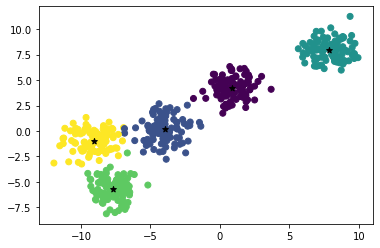

In [371]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='black');